<a href="https://colab.research.google.com/github/a-dhingra/JupyterNotebooks/blob/master/KeithGalli_SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, time, sys
import seaborn as sns
print('Setup Complete')

Setup Complete


In [2]:
sample_data_link = r'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv'


In [3]:
import calendar
df = pd.DataFrame() # creating empty dataframe

for x in range(1,13): # reading different files and concatenating them
  temp = pd.read_csv(f'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{calendar.month_name[x]}_2019.csv', parse_dates=['Order Date'])
  df = pd.concat([df,temp])
  print(f'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{calendar.month_name[x]}_2019.csv')
  print(df.size)

https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_January_2019.csv
58338
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_February_2019.csv
130554
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_March_2019.csv
221910
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv
332208
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_May_2019.csv
432018
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_June_2019.csv
513750
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_July_2019.csv
599976
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/Sales

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df.shape

(186850, 6)

In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
import datetime as dt
df['Purchase_zipcode'] = df['Purchase Address'].str[-5:]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301


In [8]:
df['Purchase_state'] = df['Purchase Address'].str[-8:-6]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX


In [9]:
df['Purchase_city'] = df['Purchase Address'].str.split(',').str[1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin


In [10]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Purchase_zipcode    object
Purchase_state      object
Purchase_city       object
dtype: object

In [11]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Purchase_zipcode    545
Purchase_state      545
Purchase_city       900
dtype: int64

In [12]:
df_null = df[df.isnull()]
df_null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_null.shape

(186850, 9)

In [14]:
dff= df.dropna()
dff.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin


In [15]:
dff.shape

(185950, 9)

In [16]:
dff['Order_Date_parsed'] = pd.to_datetime(dff['Order Date'], format="%m/%d/%y %H:%M", errors='coerce')
dff.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00


In [17]:
dff.dtypes

Order ID                     object
Product                      object
Quantity Ordered             object
Price Each                   object
Order Date                   object
Purchase Address             object
Purchase_zipcode             object
Purchase_state               object
Purchase_city                object
Order_Date_parsed    datetime64[ns]
dtype: object

In [18]:
dff['Order_Date_month'] = dff['Order_Date_parsed'].dt.month
dff['Order_Date_month'] = dff['Order_Date_month'].apply(lambda x : calendar.month_name[x])
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January


# Distribution of Orders over months

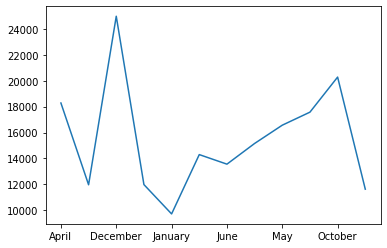

In [19]:
dff['Order_Date_month'].value_counts(dropna=False).sort_index().plot()

# Distribution of Orders over days

*   List item
*   List item



In [20]:
dff['Order_Date_day'] = dff['Order_Date_parsed'].dt.day
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25


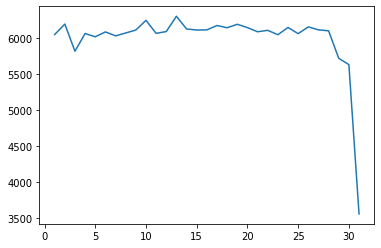

In [21]:
dff['Order_Date_day'].value_counts().sort_index().plot()

# Distribution of Orders over days of the week


In [22]:
dff['Order_Date_parsed_day_of_week'] = dff.loc[:,'Order_Date_parsed'].apply(lambda x: calendar.day_name[x.weekday()])
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday


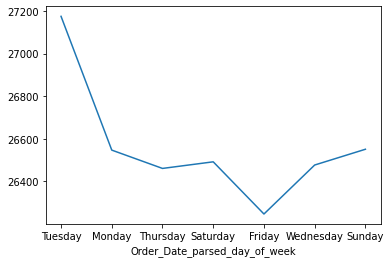

In [23]:
dff.groupby('Order_Date_parsed_day_of_week', sort=False)['Order ID'].count().plot()

# Value of the Orders

In [24]:
dff['Order_value'] = dff.loc[:,'Quantity Ordered'].astype(float) * dff.loc[:,'Price Each'].astype(float)
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week,Order_value
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday,11.99


# States with total value of orders

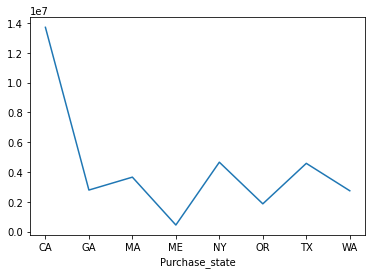

In [25]:
dff.groupby('Purchase_state')['Order_value'].sum().plot()

In [26]:
len(dff['Purchase_state'].unique())

8

# Months with total value of Orders

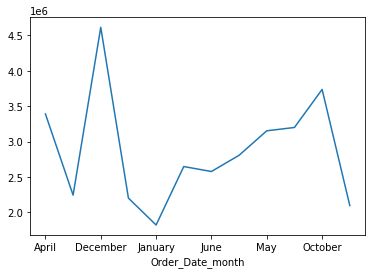

In [27]:
dff.groupby('Order_Date_month')['Order_value'].sum().plot()


# Data Exploration

### Question 1: What was the best month for sales? How much was earned that month?


In [28]:
dff.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week,Order_value
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday,11.99


In [29]:
sales_by_month = pd.DataFrame(dff.groupby(['Order_Date_month'])['Order_value'].sum())
# sales_by_month[['Order_value']].idxmax()[0]
print(f'Month with the highest sales : {sales_by_month.idxmax()[0]}')

Month with the highest sales : December


In [30]:
sales_by_month.mean()/1000000

Order_value    2.874336
dtype: float64

In [31]:
sales_by_month.head()

,Order_value
Order_Date_month,
April,3390670.24
August,2244467.88
December,4613443.34
February,2202022.42
January,1822256.73


In [32]:
sales_by_month['Sales_in_millions'] = sales_by_month['Order_value']/1000000
sales_by_month.head()

,Order_value,Sales_in_millions
Order_Date_month,,
April,3390670.24,3.390670
August,2244467.88,2.244468
December,4613443.34,4.613443
February,2202022.42,2.202022
January,1822256.73,1.822257


In [33]:
print(f'Average Sales per month in millions : {sales_by_month.Sales_in_millions.mean()} millions')

Average Sales per month in millions : 2.874336330833333 millions


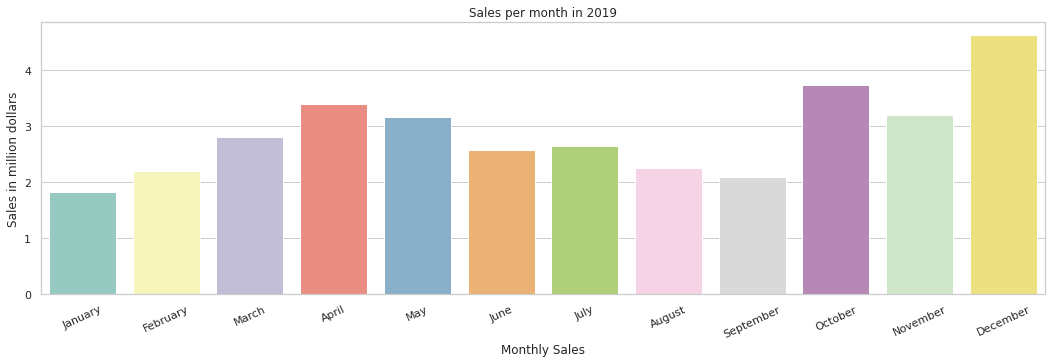

In [34]:
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November','December']

#Seaborn barplot of categorical values
sns.set(style='whitegrid')
plt.figure(figsize=(18, 5))

sns.barplot(x=sales_by_month.index, y='Sales_in_millions', 
                      data=sales_by_month, order=months, palette='Set3')
plt.xticks(rotation=25)
plt.xlabel('Monthly Sales')
plt.ylabel('Sales in million dollars')
plt.yscale('linear')
plt.title('Sales per month in 2019')
plt.show()

## Question 2: What city sold the most product?

In [35]:
dff.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week,Order_value
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday,11.99


In [36]:
sales_by_city = pd.DataFrame(dff.groupby(['Purchase_city'])['Order_value'].sum())
sales_by_city.head()

,Order_value
Purchase_city,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80


In [37]:
sales_by_city['sales_in_millions'] = sales_by_city['Order_value']/1000000
sales_by_city.head()

,Order_value,sales_in_millions
Purchase_city,,
Atlanta,2795498.58,2.795499
Austin,1819581.75,1.819582
Boston,3661642.01,3.661642
Dallas,2767975.40,2.767975
Los Angeles,5452570.80,5.452571


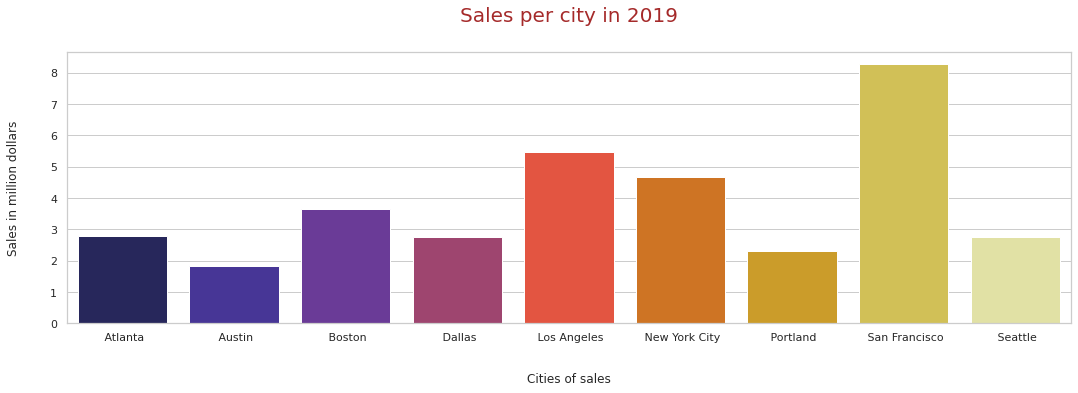

In [38]:
sns.set(style='whitegrid')
plt.figure(figsize=(18, 5))

sns.barplot(x=sales_by_city.index, y='sales_in_millions', 
                      data=sales_by_city, palette='CMRmap')
plt.xticks(rotation=0)
plt.xlabel('Cities of sales',labelpad=30)
plt.ylabel('Sales in million dollars',labelpad=30)
plt.yscale('linear')
plt.title('Sales per city in 2019', pad=30, fontdict={'fontsize':20,'color':'brown'})
plt.show()

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [39]:
dff.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week,Order_value
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday,11.99


In [40]:
dff['order_hour'] = dff['Order_Date_parsed'].dt.hour
dff['order_minute'] = dff['Order_Date_parsed'].dt.minute
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week,Order_value,order_hour,order_minute
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday,700.00,21,25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday,14.95,14,15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday,23.98,13,33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday,149.99,20,33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday,11.99,11,59


In [41]:
dff.dtypes

Order ID                                 object
Product                                  object
Quantity Ordered                         object
Price Each                               object
Order Date                               object
Purchase Address                         object
Purchase_zipcode                         object
Purchase_state                           object
Purchase_city                            object
Order_Date_parsed                datetime64[ns]
Order_Date_month                         object
Order_Date_day                            int64
Order_Date_parsed_day_of_week            object
Order_value                             float64
order_hour                                int64
order_minute                              int64
dtype: object

In [42]:
dff['Quantity Ordered'] = dff['Quantity Ordered'].apply(lambda x : int(x))
dff.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Order ID                                 object
Product                                  object
Quantity Ordered                          int64
Price Each                               object
Order Date                               object
Purchase Address                         object
Purchase_zipcode                         object
Purchase_state                           object
Purchase_city                            object
Order_Date_parsed                datetime64[ns]
Order_Date_month                         object
Order_Date_day                            int64
Order_Date_parsed_day_of_week            object
Order_value                             float64
order_hour                                int64
order_minute                              int64
dtype: object

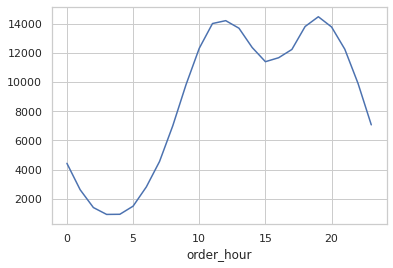

In [43]:
dff.groupby(['order_hour'])['Quantity Ordered'].sum().plot()

In [83]:
print('Best Time for advertisement is before 11 am and 7:30 pm')

Best Time for advertisement is before 11 am and 7:30 pm


## Question 4: What products are most often sold together?


In [44]:
len(dff['Order ID'].unique())

178437

In [45]:
dff.shape

(185950, 16)

In [46]:
orderID_multiple_products = pd.DataFrame(dff['Order ID'].value_counts())
orderID_multiple_products = orderID_multiple_products[orderID_multiple_products['Order ID'] != 1]
orderID_multiple_products.shape

(7136, 1)

In [55]:
# dff_products = dff.groupby(['Order ID'])['Product'].apply(','.join).reset_index()
dff_products = dff.groupby(['Order ID'], as_index=False).agg({'Product': ','.join})

def make_list(x):
  return x.split(',')

dff_products['Product_list'] = dff_products['Product'].apply(lambda x: make_list(x))

dff_products['len'] = dff_products['Product_list'].apply(lambda x:len(x))


print(dff_products.head(),'\n', dff_products.shape,'\n', dff.shape)

  Order ID                   Product                Product_list  len
0   141234                    iPhone                    [iPhone]    1
1   141235  Lightning Charging Cable  [Lightning Charging Cable]    1
2   141236          Wired Headphones          [Wired Headphones]    1
3   141237          27in FHD Monitor          [27in FHD Monitor]    1
4   141238          Wired Headphones          [Wired Headphones]    1 
 (178437, 4) 
 (185950, 16)


In [56]:
dff_products[dff_products['len']>1].head()

,Order ID,Product,Product_list,len
41,141275,"USB-C Charging Cable,Wired Headphones","[USB-C Charging Cable, Wired Headphones]",2
56,141290,"Apple Airpods Headphones,AA Batteries (4-pack)","[Apple Airpods Headphones, AA Batteries (4-pack)]",2
131,141365,"Vareebadd Phone,Wired Headphones","[Vareebadd Phone, Wired Headphones]",2
150,141384,"Google Phone,USB-C Charging Cable","[Google Phone, USB-C Charging Cable]",2
216,141450,"Google Phone,Bose SoundSport Headphones","[Google Phone, Bose SoundSport Headphones]",2


In [64]:
dff_products.dtypes

Order ID        object
Product         object
Product_list    object
len              int64
dtype: object

In [79]:
dff_products[dff_products['len']==5]['Product'].to_list()


['iPhone,Lightning Charging Cable,Apple Airpods Headphones,Wired Headphones,Google Phone']

In [82]:
ans5 = dff_products[dff_products['len']==5]['Product'].to_list()
print(f"Products most sold together are : {' '.join(ans5)}")

Products most sold together are : iPhone,Lightning Charging Cable,Apple Airpods Headphones,Wired Headphones,Google Phone


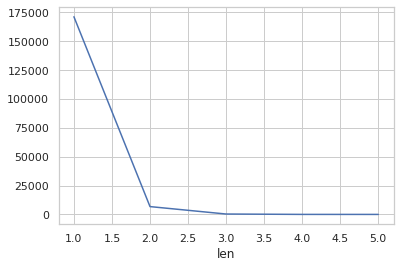

In [49]:
dff_products.groupby('len')['Product_list'].count().plot()

In [50]:
dff_products['len'].value_counts()

1    171301
2      6778
3       340
4        17
5         1
Name: len, dtype: int64

## Questions 5 : What product sold the most? Why do you think it sold the most?


In [86]:
from collections import Counter

temp = Counter()
for x in dff_products.loc[:,'Product_list']:
  temp.update(x)

print(temp)

Counter({'USB-C Charging Cable': 21903, 'Lightning Charging Cable': 21658, 'AAA Batteries (4-pack)': 20641, 'AA Batteries (4-pack)': 20577, 'Wired Headphones': 18882, 'Apple Airpods Headphones': 15549, 'Bose SoundSport Headphones': 13325, '27in FHD Monitor': 7507, 'iPhone': 6842, '27in 4K Gaming Monitor': 6230, '34in Ultrawide Monitor': 6181, 'Google Phone': 5525, 'Flatscreen TV': 4800, 'Macbook Pro Laptop': 4724, 'ThinkPad Laptop': 4128, '20in Monitor': 4101, 'Vareebadd Phone': 2065, 'LG Washing Machine': 666, 'LG Dryer': 646})


In [96]:
df_temp = pd.DataFrame().from_dict(temp, orient='index').reset_index()
df_temp.head()

,index,0
0,iPhone,6842
1,Lightning Charging Cable,21658
2,Wired Headphones,18882
3,27in FHD Monitor,7507
4,AAA Batteries (4-pack),20641


In [98]:
print('Changing Column names')
df_temp = df_temp.rename(columns={'index':'Products',0:'Count'})
df_temp.head()

Changing Column names


,Products,Count
0,iPhone,6842
1,Lightning Charging Cable,21658
2,Wired Headphones,18882
3,27in FHD Monitor,7507
4,AAA Batteries (4-pack),20641


In [105]:
df_temp_sorted = df_temp.sort_values(by='Count', ascending=False).reset_index()
df_temp_sorted.pop('index')
df_temp_sorted.head()

,Products,Count
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882


<Figure size 720x576 with 0 Axes>

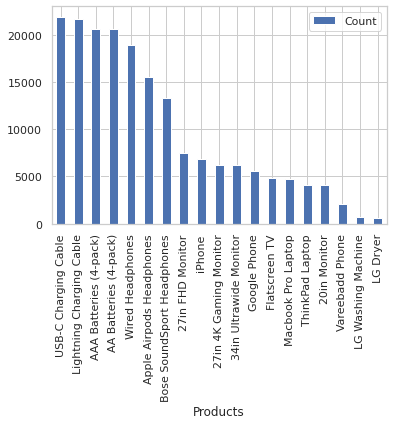

In [111]:
plt.figure(figsize = (10,8))
df_temp_sorted.plot(x='Products',y='Count',kind='bar',)

In [114]:
print(f"Most sold product : {df_temp_sorted.loc[1,'Products']}")

Most sold product : Lightning Charging Cable
